In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

#--------------------Setup the main directories------------------#
#Define the various directorieszz
script_dir = os.getcwd()                         #define current dir
main_dir = os.path.dirname(script_dir)           #go up of one directory
results_dir = os.path.join(main_dir, "figure")   #define results dir

if not os.path.exists(results_dir):              #if the directory does not exist create it
    os.mkdir(results_dir)


In [67]:
#Generate a sine signal plus a noise
def signal(t, A, f, noise):
    return A * np.sin(2*np.pi*f*t) + noise

#function that return the fft of signal and filtered signal
def FFT(fs, signal, signal_filtered):
    freqs = fftpack.fftfreq(len(signal)) * fs
    Y = fftpack.fft(signal)
    Y_filt = fftpack.fft(signal_filtered)
    return freqs, Y, Y_filt
    

#additive noise
def add_noise(t, An, fn):
    return  An * np.sin(2*np.pi*fn*t)

#create a digital low pass filter
def digitalLowPass(y, x, fs, w0):
    A = w0 / (2*fs + w0)
    b0 = 1
    b1 = 1
    a1 = ( 2*fs - w0 ) / (2*fs + w0)
    
    #direct form I
    for k in range(1, len(y)):
        y[k] = A*(b0*x[k]+b1*x[k-1]) + a1*y[k-1]
    
    return y


if __name__ == '__main__':
    
    #define time array
    t_start = 0  #start time of the signal [s]
    t_end = 1    #end time [s]
    fs = 800     #sampling frequency of the signal [Hz] --> ts = 1/fs
    
    t = np.linspace(t_start, t_end, (t_end - t_start)*fs)

    #Parameters of the signal
    f = 4     #sine wave frequency [Hz]
    A = 1     #sine magnitude
   
    #Generate the noise
    #-----------sinusoidal noise-----------#
    fn = 50   #noise frequency [Hz]
    An = 0.3  #noise magnitude
    add_noise = add_noise(t, An, fn)
    #-------------white noise--------------#
    mean = 0     #center of the distribution
    std = 1      #width of the distribution
    num_samples = len(t)
    white_noise = np.random.normal(mean, std, size=num_samples)
    #--------------shot noise--------------#
    lam = 0.2
    shot_noise = np.random.poisson(lam, num_samples)
        
    #generate the signal
    y_add = signal(t, A, f, add_noise)
    y_gauss = signal(t, A, f, white_noise)
    y_shot = signal(t, A, f, shot_noise)
    
    #response of digital low pass filter  
    f0 = 5                                                    #cut off frequency [Hz]
    w0 = 2*np.pi*f0
    ylp_add = np.zeros(len(t))                                #inizialize an array of y for the response
    ylp_gauss = np.zeros(len(t))                              
    ylp_shot = np.zeros(len(t))                             
    
    ylp_add = digitalLowPass(ylp_add, y_add, fs, w0)          #signal filtered
    ylp_gauss = digitalLowPass(ylp_gauss, y_gauss, fs, w0)    
    ylp_shot = digitalLowPass(ylp_shot, y_shot, fs, w0)      
    
    #compute the Fast Fourier transform
    freqs, Y_add, Ylp_add = FFT(fs, y_add, ylp_add)
    freqs, Y_gauss, Ylp_gauss = FFT(fs, y_gauss, ylp_gauss)
    freqs, Y_shot, Ylp_shot = FFT(fs, y_shot, ylp_shot)

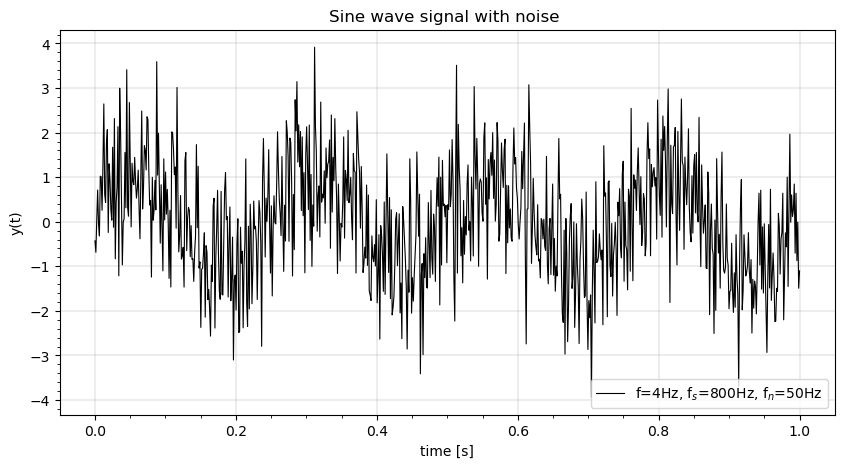

In [36]:
#--------------------------Plot results----------------------#
plt.rc('font',size=10)
plt.figure(figsize=(10,5))
plt.title("Sine wave signal with noise ")
plt.xlabel("time [s]")
plt.ylabel("y(t)")
plt.grid(color='gray',linewidth='0.2')
plt.minorticks_on()

plt.plot(t,y_gauss, linestyle = '-', linewidth = '0.8', marker = '', color = 'black', label = 'f=4Hz, f$_s$=800Hz, f$_n$=50Hz')
plt.legend(loc = 'lower right')

# save the plot in the results dir
#out_name = os.path.join(results_dir, "signal_noise.png")
#plt.savefig(out_name)
plt.show()

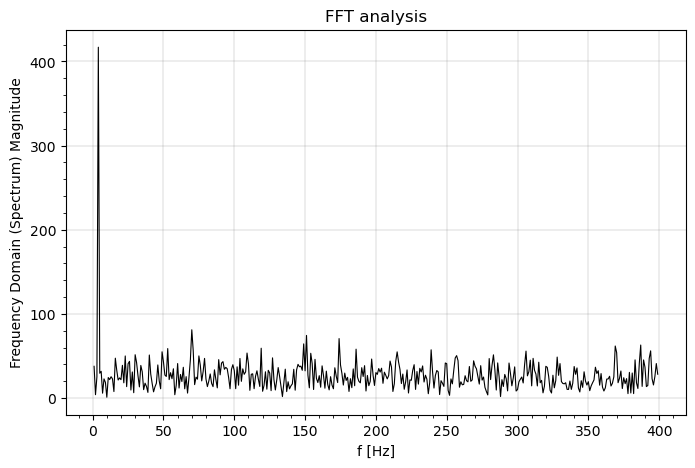

In [64]:
#--------------------------Plot results----------------------#
plt.rc('font',size=10)
plt.figure(figsize=(8,5))
plt.title("FFT analysis")
plt.xlabel("f [Hz]")
plt.ylabel("Frequency Domain (Spectrum) Magnitude")
#plt.xlim(0,fs/2)
plt.grid(color='gray',linewidth='0.2')
plt.minorticks_on()

plt.plot(freqs[np.where(freqs>0)],np.abs(Y_gauss)[np.where(freqs>0)], linestyle = '-', linewidth = '0.8', marker = '', color = 'black')

# save the plot in the results dir
#out_name = os.path.join(results_dir, "fft_analysis.png")
#plt.savefig(out_name)
plt.show()

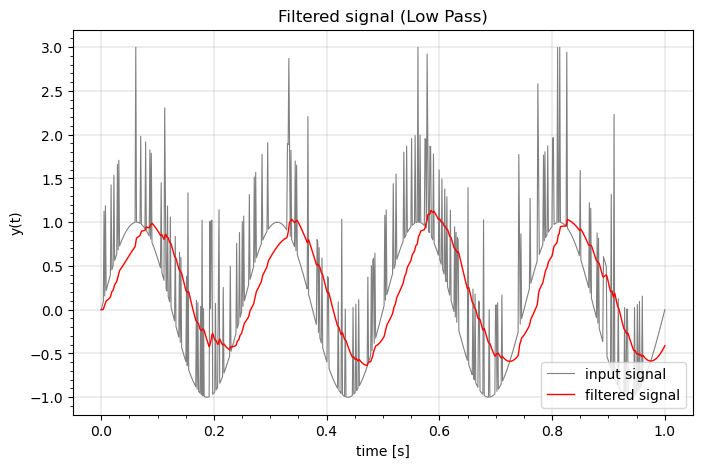

In [68]:
#--------------------------Plot results----------------------#
plt.rc('font',size=10)
plt.figure(figsize=(8,5))
plt.title("Filtered signal (Low Pass)")
plt.xlabel("time [s]")
plt.ylabel("y(t)")
plt.grid(color='gray',linewidth='0.2')
plt.minorticks_on()

plt.plot(t,y_shot, linestyle = '-', linewidth = '0.8', marker = '', color = 'gray', label = 'input signal')
plt.plot(t,ylp_shot, linestyle = '-', linewidth = '1', marker = '', color = 'red', label = 'filtered signal')
plt.legend(loc = 'lower right')

# save the plot in the results dir
#out_name = os.path.join(results_dir, "filtered_signal_gauss.png")
#plt.savefig(out_name)
plt.show()


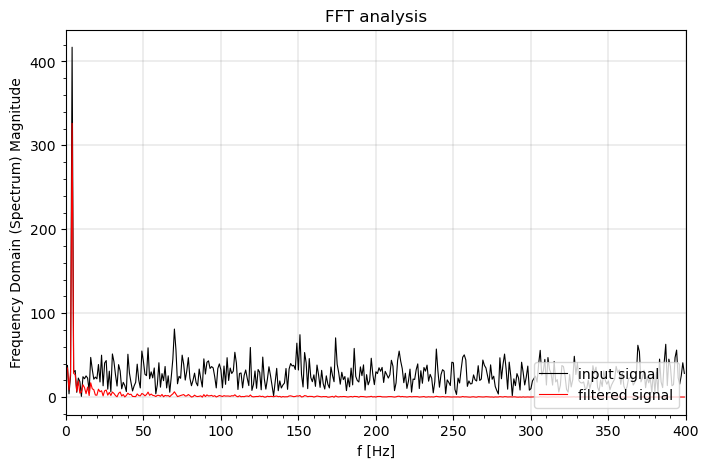

In [65]:
#--------------------------Plot results----------------------#
plt.rc('font',size=10)
plt.figure(figsize=(8,5))
plt.title("FFT analysis")
plt.xlabel("f [Hz]")
plt.ylabel("Frequency Domain (Spectrum) Magnitude")
plt.xlim(0,fs/2)
plt.grid(color='gray',linewidth='0.2')
plt.minorticks_on()

plt.plot(freqs[np.where(freqs>0)],np.abs(Y_gauss)[np.where(freqs>0)], linestyle = '-', linewidth = '0.8', marker = '', color = 'black', label = 'input signal')
plt.plot(freqs[np.where(freqs>0)],np.abs(Ylp_gauss)[np.where(freqs>0)], linestyle = '-', linewidth = '0.8', marker = '', color = 'red', label = 'filtered signal')
plt.legend(loc = 'lower right')

# save the plot in the results dir
out_name = os.path.join(results_dir, "fft_analysis_filtered_gauss.png")
plt.savefig(out_name)
plt.show()